<a href="https://colab.research.google.com/github/kamanl/4170/blob/main/4170.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
chocolate = pd.read_csv('chocolate.csv')

In [3]:
chocolate

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


Commonly Used Ingredients

In [4]:
def changetobool(s):
  return s.apply(lambda x: False if 'not' in x else True)

In [5]:
chocolate['vanilla'] = changetobool(chocolate['vanilla'])

In [6]:
chocolate['cocoa_butter'] = changetobool(chocolate['cocoa_butter'])

In [7]:
chocolate['sugar'] = changetobool(chocolate['sugar'])

In [8]:
chocolate['salt'] = changetobool(chocolate['salt'])

In [9]:
chocolate['lecithin'] = changetobool(chocolate['lecithin'])

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
ingredients = chocolate[['cocoa_butter','vanilla','lecithin','salt','sugar']].copy()

In [12]:
ingredientsPercent = ingredients.mean().sort_values(ascending=False) * 100
ingredientsPercent

sugar           96.312950
cocoa_butter    69.019784
lecithin        21.537770
vanilla         15.647482
salt             1.663669
dtype: float64

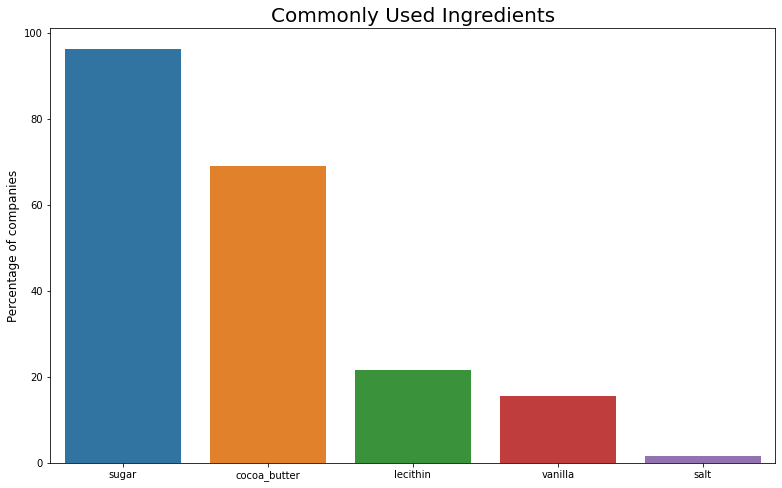

In [13]:
plt.figure(figsize=(13,8)) 
sns.barplot(x=ingredientsPercent.index,y=ingredientsPercent)
plt.title("Commonly Used Ingredients", size=20)
plt.ylabel('Percentage of companies',size=12);

The Popularity for Different Percent of Cocoa Over Years

Text(0, 0.5, 'Percentage of Cocoa')

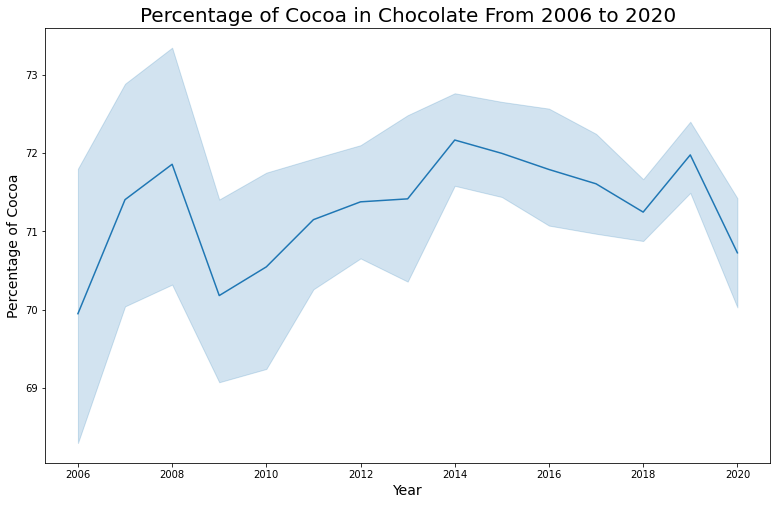

In [14]:
plt.figure(figsize=(13,8)) 
sns.lineplot(x=chocolate.review_date, y=chocolate.cocoa_percent)
plt.title("Percentage of Cocoa in Chocolate From 2006 to 2020", size=20);
plt.xlabel('Year', size=14)
plt.ylabel('Percentage of Cocoa', size=14)

Percentage of Cocoa in Chocolate Bar Used by top rated companies

In [15]:
topRatedCompanies = chocolate[chocolate.rating == chocolate.rating.max()]
topRatedCompanies

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
5,5,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.0,4,have_bean,True,False,True,False,True,have_not_sweetener_without_sugar,oily,nut,caramel,raspberry
6,6,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,4.0,3,have_bean,True,False,False,False,True,have_not_sweetener_without_sugar,sweet,cocoa,tangerine,NaN
16,16,1319,A. Morin,France,2014,Peru,Pablino,70.0,4.0,4,have_bean,True,False,True,False,True,have_not_sweetener_without_sugar,delicate,hazelnut,brownie,NaN
72,72,470,Amano,U.S.A,2010,Ecuador,Guayas,70.0,4.0,4,have_bean,True,True,False,False,True,have_not_sweetener_without_sugar,strong spice,intense pepper,NaN,NaN
75,75,725,Amano,U.S.A,2011,Papua new guinea,Morobe,70.0,4.0,4,have_bean,True,True,False,False,True,have_not_sweetener_without_sugar,tart,lemon,smoke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,2114,757,Valrhona,France,2011,Venezuela,"Porcelana, Pedegral",64.0,4.0,5,have_bean,True,True,True,False,True,have_not_sweetener_without_sugar,creamy,honey,peanut butter,NaN
2116,2116,931,Valrhona,France,2012,Venezuela,"Otucan, Grand Cru",69.0,4.0,5,have_bean,True,True,True,False,True,have_not_sweetener_without_sugar,green,unripened fruit,banana,NaN
2119,2119,1510,Valrhona,France,2015,Peru,"Piura, Illanka, Quemazon",63.0,4.0,5,have_bean,True,True,True,False,True,have_not_sweetener_without_sugar,intense,dark berry,grapes,NaN
2162,2162,1848,Willie's Cacao,U.k.,2016,Colombia,Los Llanos,70.0,4.0,3,have_bean,True,False,False,False,True,have_not_sweetener_without_sugar,rich cocoa,spicy,cinamon,NaN


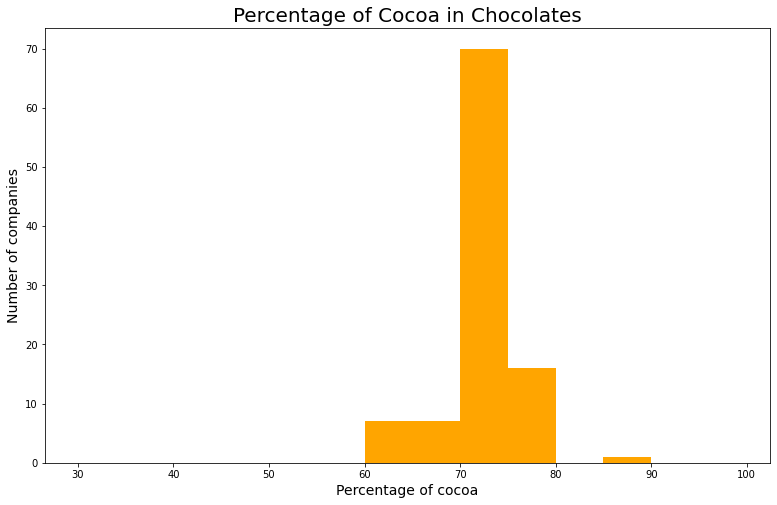

In [16]:
plt.figure(figsize=(13,8)) 
plt.title("Percentage of Cocoa in Chocolates", size=20)
plt.xlabel('Percentage of cocoa', size=14)
plt.ylabel('Number of companies', size=14)
plt.hist(topRatedCompanies.cocoa_percent, bins=[30, 50, 60, 65, 70, 75, 80, 85 ,90, 95, 99], color='Orange');

Countries of Bean Origin for Top Rated Companies

In [17]:
topBeanCountries = topRatedCompanies.country_of_bean_origin.value_counts()
topBeanCountries

Venezuela           18
Peru                16
Madagascar          10
Ecuador              8
Blend                7
Bolivia              5
Colombia             5
Brazil               4
Papua new guinea     4
Mexico               3
Guatemala            3
Haiti                3
Ghana                2
Belize               2
Costa rica           2
Nicaragua            2
Sao tome             1
Solomon islands      1
St. lucia            1
Tanzania             1
Indonesia            1
Jamaica              1
Vietnam              1
Name: country_of_bean_origin, dtype: int64

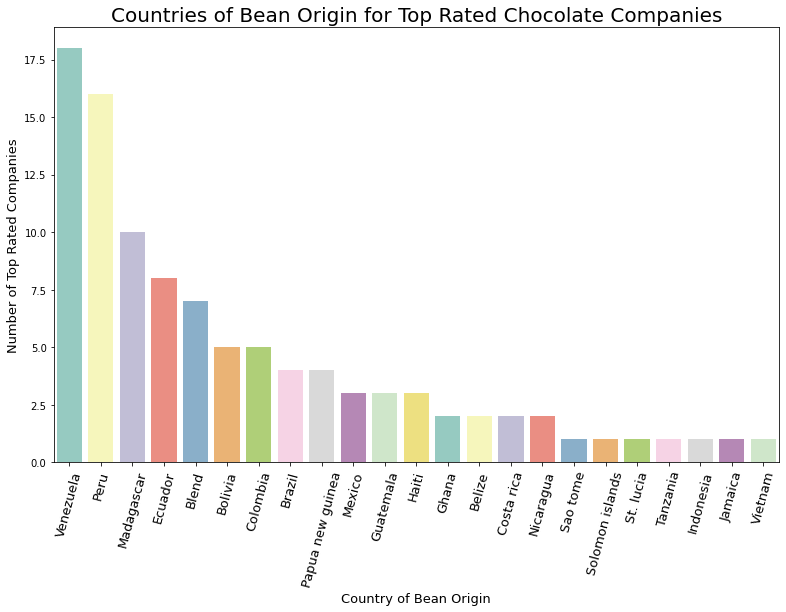

In [18]:
plt.figure(figsize=(13,8)) 
plt.xticks(size=(13),rotation=75)
plt.title('Countries of Bean Origin for Top Rated Chocolate Companies', size=20)
sns.barplot(x=topBeanCountries.index, y=topBeanCountries, palette="Set3")
plt.xlabel("Country of Bean Origin",size=13)
plt.ylabel("Number of Top Rated Companies",size=13);

Top Thirty Companies With Best Rating

In [19]:
averageRating = chocolate.groupby(['company','company_location'], as_index=False)[['rating']].mean()
topHundred = averageRating.sort_values('rating', ascending=False).head(100)
topHundred

,company,company_location,rating
352,Ocelot,Scotland,3.875000
225,Heirloom Cacao Preservation (Zokoko),U.S.A,3.875000
303,Matale,Australia,3.812500
371,Patric,U.S.A,3.791667
233,Idilio (Felchlin),Switzerland,3.775000
...,...,...,...
12,Amano,U.S.A,3.416667
363,Pacari,Ecuador,3.416667
451,Taste Artisan,U.S.A,3.416667
38,Bellflower,U.S.A,3.416667


In [20]:
topCountries= topHundred.company_location.value_counts()
topCountries

U.S.A                 44
Canada                 8
Australia              5
Brazil                 4
France                 4
Netherlands            3
Japan                  3
Germany                3
U.k.                   2
Ecuador                2
Spain                  2
Thailand               1
Denmark                1
South korea            1
Chile                  1
Guatemala              1
Italy                  1
Switzerland            1
Colombia               1
Philippines            1
Czech republic         1
Vietnam                1
Dominican republic     1
Finland                1
Argentina              1
Madagascar             1
Poland                 1
Sao tome               1
Belgium                1
New zealand            1
Scotland               1
Name: company_location, dtype: int64

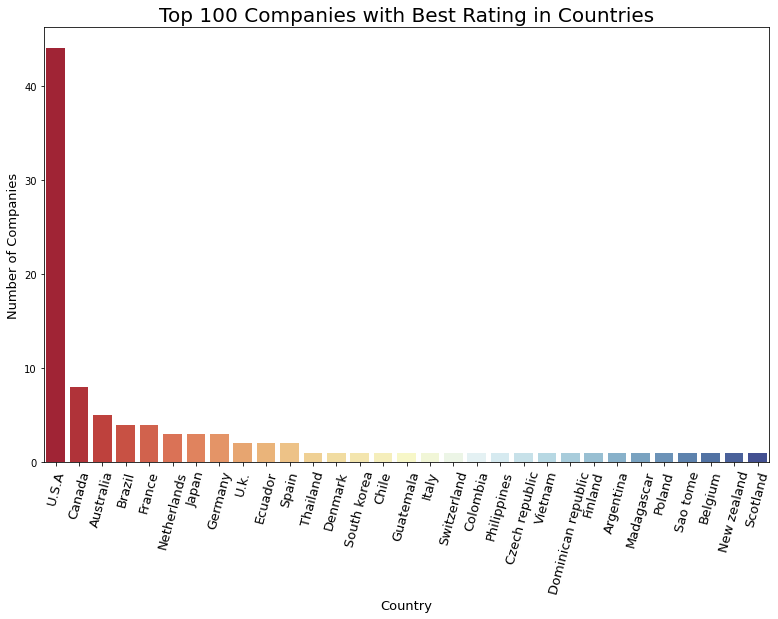

In [21]:
plt.figure(figsize=(13,8)) 
plt.xticks(rotation=75,size=13)
plt.title('Top 100 Companies with Best Rating in Countries', size=20)
sns.barplot(x=topCountries.index, y=topCountries, palette="RdYlBu")
plt.xlabel("Country", size=13)
plt.ylabel("Number of Companies", size=13);